# Demo notebook for APPRAISE

Author: Xiaozhe Ding

Email: xding@caltech.edu, dingxiaozhe@gmail.com

In [1]:
#For testing purposes
%load_ext autoreload
%autoreload 2

## Required environment

#### Operating system

MacOS or Linux

#### Softwares

PyMOL Version 2.3.3+ (Schrodinger LLC.)

#### Python packages

Python 3.7 +

pandas

numpy

...... [to finish]

## Step 0 - Install the appraise package (if you haven't done so)

If you haven't install the appraise package for essential modules, run the following line to install it and *restart the kernal*.

In [2]:
!pip install -e ../../appraise

Obtaining file:///Users/xiaozhe/Dropbox%20%28Personal%29/F/F100_G-lab_general/F110_Manuscripts/F112_APPRAISE-AAV_manuscript/appraise
  Preparing metadata (setup.py) ... done
  Attempting uninstall: appraise
    Found existing installation: appraise 0.2
    Uninstalling appraise-0.2:
      Successfully uninstalled appraise-0.2
  Running setup.py develop for appraise


### Utility functions

Please run the cells below every time you start this note book to import the utility functions (TODO: turn into a utlities.py)

In [2]:
from appraise.utilities import *


Bad key "text.kerning_factor" on line 4 in
/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Step 1 - Prepare fasta input for AlphaFold

The input .csv table should hive two columns, each titled "peptide_name" and "peptide_seq". '

You can use ./sample_peptide_list.csv as a template to prepare your own input. 

In [3]:
from appraise import input_fasta_prep

For easy measurement, we use gget package to run AlphaFold locally to obtain the structure and and Hull

### Generate input fasta for pairwise matrix

In [8]:
#@title Input protein sequence, then hit `Runtime` -> `Run all`

csv_file_path = interactive_input('csv_file_path','./pairwise/peptide_list_TTD_pub_new.csv') #@param {type:"string"}

folder_path_for_fastas = interactive_input('folder_path_for_fastas', './pairwise/TTD_huCar4_input_fasta/')#@param {type:"string"}

receptor_name = interactive_input('receptor_name', 'huCar4') #@param {type:"string"}

receptor_seq = interactive_input('receptor_seq', "YEVQAESSNYPCLVPVKWGGNCQKDRQSPINIVTTKAKVDKKLGRFFFSGYDKKQTWTVQNNGHSVMMLLENKASISGGGLPAPYQAKQLHLHWSDLPYKGSEHSLDGEHFAMEMHIVHEKEKGTSRNVKEAQDPEDEIAVLAFLVEIGRMNWPPPLAPCRLSQDPSLPFQAGTQVNEGFQPLVEALSNIPKPEMSTTMAESSLLDLLPKEEKLRHYFRYLGSLTTPTCDEKVVWTVFREPIQLHREQILAFSQKLYYDKEQTVSMKDNVRPLQQLGQRTVIKS") #@param {type:"string"}

peptide_names, peptide_seqs = input_fasta_prep.load_peptides(csv_file_path)

list_query_sequence, list_jobname = input_fasta_prep.get_complex_fastas(receptor_name, \
                                                                        receptor_seq,
                                                                        peptide_names, \
                                                                        peptide_seqs, \
                                                                        mode = 'pairwise', \
                                                                        square_matrix = True, \
                                                                        folder_path = folder_path_for_fastas)

Default csv_file_path is [./pairwise/peptide_list_TTD_pub_new.csv], need to change? Provide new value or hit Enter to use default


>  


Default folder_path_for_fastas is [./pairwise/TTD_huCar4_input_fasta/], need to change? Provide new value or hit Enter to use default


>  


Default receptor_name is [huCar4], need to change? Provide new value or hit Enter to use default


>  


Default receptor_seq is [YEVQAESSNYPCLVPVKWGGNCQKDRQSPINIVTTKAKVDKKLGRFFFSGYDKKQTWTVQNNGHSVMMLLENKASISGGGLPAPYQAKQLHLHWSDLPYKGSEHSLDGEHFAMEMHIVHEKEKGTSRNVKEAQDPEDEIAVLAFLVEIGRMNWPPPLAPCRLSQDPSLPFQAGTQVNEGFQPLVEALSNIPKPEMSTTMAESSLLDLLPKEEKLRHYFRYLGSLTTPTCDEKVVWTVFREPIQLHREQILAFSQKLYYDKEQTVSMKDNVRPLQQLGQRTVIKS], need to change? Provide new value or hit Enter to use default


>  


> Created folder ./pairwise/TTD_huCar4_input_fasta/
> Generated ./pairwise/TTD_huCar4_input_fasta/huCar4_and_AAV-MacPNS1_vs_AAV-MacPNS1.fasta
> Generated ./pairwise/TTD_huCar4_input_fasta/huCar4_and_AAV-MacPNS1_vs_AAV-MacPNS2.fasta
> Generated ./pairwise/TTD_huCar4_input_fasta/huCar4_and_AAV-MacPNS1_vs_CAP-Mac.fasta
> Generated ./pairwise/TTD_huCar4_input_fasta/huCar4_and_AAV-MacPNS1_vs_CAP-C2.fasta
> Generated ./pairwise/TTD_huCar4_input_fasta/huCar4_and_AAV-MacPNS2_vs_AAV-MacPNS1.fasta
> Generated ./pairwise/TTD_huCar4_input_fasta/huCar4_and_AAV-MacPNS2_vs_AAV-MacPNS2.fasta
> Generated ./pairwise/TTD_huCar4_input_fasta/huCar4_and_AAV-MacPNS2_vs_CAP-Mac.fasta
> Generated ./pairwise/TTD_huCar4_input_fasta/huCar4_and_AAV-MacPNS2_vs_CAP-C2.fasta
> Generated ./pairwise/TTD_huCar4_input_fasta/huCar4_and_CAP-Mac_vs_AAV-MacPNS1.fasta
> Generated ./pairwise/TTD_huCar4_input_fasta/huCar4_and_CAP-Mac_vs_AAV-MacPNS2.fasta
> Generated ./pairwise/TTD_huCar4_input_fasta/huCar4_and_CAP-Mac_vs_CAP-Ma

### Generate input fasta for pooled competition

In [31]:
csv_file_path = interactive_input('csv_file_path','./mock_selection/mock_selection_100_selected_sequences.csv') #@param {type:"string"}

folder_path_for_fastas = interactive_input('folder_path_for_fastas', './mock_selection/mock100_R1_grouping2_input_fasta/')#@param {type:"string"}

receptor_name = interactive_input('receptor_name', 'Ly6a') #@param {type:"string"}

receptor_seq = interactive_input('receptor_seq', "LECYQCYGVPFETSCPSITCPYPDGVCVTQEAAVIVDSQTRKVKNNLCLPICPPNIESMEILGTKVNVKTSCCQEDLCNVAVP") #@param {type:"string"}

pool_size = interactive_input('pool_size', 4) #@param {type:"string"}

peptide_names, peptide_seqs = input_fasta_prep.load_peptides(csv_file_path)

list_query_sequence, list_jobname = input_fasta_prep.get_complex_fastas(receptor_name, \
                                                                        receptor_seq,
                                                                        peptide_names, \
                                                                        peptide_seqs, \
                                                                        mode = 'pooled', \
                                                                        pool_size = pool_size,\
                                                                        folder_path = folder_path_for_fastas)

Default csv_file_path is [./mock_selection/mock_selection_100_selected_sequences.csv], need to change? Provide new value or hit Enter to use default


>  


Default folder_path_for_fastas is [./mock_selection/mock100_R1_grouping2_input_fasta/], need to change? Provide new value or hit Enter to use default


>  


Default receptor_name is [Ly6a], need to change? Provide new value or hit Enter to use default


>  


Default receptor_seq is [LECYQCYGVPFETSCPSITCPYPDGVCVTQEAAVIVDSQTRKVKNNLCLPICPPNIESMEILGTKVNVKTSCCQEDLCNVAVP], need to change? Provide new value or hit Enter to use default


>  


Default pool_size is [4], need to change? Provide new value or hit Enter to use default


>  


> Created folder ./mock_selection/mock100_R1_grouping2_input_fasta/
> Generated ./mock_selection/mock100_R1_grouping2_input_fasta/Ly6a_and_SRK-68_vs_SRK-41_vs_SRK-70_vs_SRK-42.fasta
> Generated ./mock_selection/mock100_R1_grouping2_input_fasta/Ly6a_and_SRK-94_vs_SRK-69_vs_SRK-45_vs_SRK-35.fasta
> Generated ./mock_selection/mock100_R1_grouping2_input_fasta/Ly6a_and_SRK-64_vs_SRK-7_vs_SRK-73_vs_SRK-91.fasta
> Generated ./mock_selection/mock100_R1_grouping2_input_fasta/Ly6a_and_SRK-34_vs_SRK-30_vs_SRK-48_vs_SRK-10.fasta
> Generated ./mock_selection/mock100_R1_grouping2_input_fasta/Ly6a_and_SRK-6_vs_SRK-49_vs_SRK-57_vs_SRK-92.fasta
> Generated ./mock_selection/mock100_R1_grouping2_input_fasta/Ly6a_and_SRK-53_vs_SRK-56_vs_SRK-71_vs_SRK-3.fasta
> Generated ./mock_selection/mock100_R1_grouping2_input_fasta/Ly6a_and_SRK-14_vs_SRK-8_vs_SRK-32_vs_SRK-79.fasta
> Generated ./mock_selection/mock100_R1_grouping2_input_fasta/Ly6a_and_SRK-61_vs_SRK-77_vs_SRK-40_vs_SRK-75.fasta
> Generated ./mock_selec

In [ ]:
#@title Input protein sequence, then hit `Runtime` -> `Run all`

csv_file_path = interactive_input('csv_file_path',database_path[0:-4] + 'selected_peptide_list.csv') #@param {type:"string"}

folder_path_for_fastas = interactive_input('folder_path_for_fastas', './mock100v3_R2_input_fasta/')#@param {type:"string"}

receptor_name = interactive_input('receptor_name', 'Ly6a') #@param {type:"string"}

receptor_seq = interactive_input('receptor_seq', "LECYQCYGVPFETSCPSITCPYPDGVCVTQEAAVIVDSQTRKVKNNLCLPICPPNIESMEILGTKVNVKTSCCQEDLCNVAVP") #@param {type:"string"}

peptide_names, peptide_seqs = input_fasta_prep.load_peptides(csv_file_path)

list_query_sequence, list_jobname = input_fasta_prep.get_complex_fastas(receptor_name, \
                                                                        receptor_seq,
                                                                        peptide_names, \
                                                                        peptide_seqs, \
                                                                        mode = 'pairwise', \
                                                                        square_matrix = True, \
                                                                        folder_path = folder_path_for_fastas)

In [ ]:
#@title Input protein sequence, then hit `Runtime` -> `Run all`

csv_file_path_1 = interactive_input('csv_file_path',database_path[0:-4] + 'selected_peptide_list_part1.csv') #@param {type:"string"}

csv_file_path_2 = interactive_input('csv_file_path',database_path[0:-4] + 'selected_peptide_list_part2.csv') #@param {type:"string"}

folder_path_for_fastas = interactive_input('folder_path_for_fastas', './mock100v3_R2_input_fasta/')#@param {type:"string"}

receptor_name = interactive_input('receptor_name', 'Ly6a') #@param {type:"string"}

receptor_seq = interactive_input('receptor_seq', "LECYQCYGVPFETSCPSITCPYPDGVCVTQEAAVIVDSQTRKVKNNLCLPICPPNIESMEILGTKVNVKTSCCQEDLCNVAVP") #@param {type:"string"}

peptide_names_1, peptide_seqs_1 = input_fasta_prep.load_peptides(csv_file_path_1)

peptide_names_2, peptide_seqs_2 = input_fasta_prep.load_peptides(csv_file_path_2)

list_query_sequence, list_jobname = input_fasta_prep.get_complex_fastas(receptor_name, \
                                                                        receptor_seq,
                                                                        peptide_names_2, \
                                                                        peptide_seqs_2, \
                                                                        mode='pairwise', \
                                                                        square_matrix=False, \
                                                                        list_peptide2_names=peptide_names_1, \
                                                                        list_peptide2_seqs=peptide_seqs_1, \
                                                                        folder_path=folder_path_for_fastas)

In [7]:
#@title Input protein sequence, then hit `Runtime` -> `Run all`

csv_file_path_1 = interactive_input('csv_file_path_1', './pairwise/nanobody_list.csv') #@param {type:"string"}

csv_file_path_2 = interactive_input('csv_file_path_1', './pairwise/nanobody_list.csv') #@param {type:"string"}

folder_path_for_fastas = interactive_input('folder_path_for_fastas', './b2AR_6x6_input_fasta/')#@param {type:"string"}

receptor_name = interactive_input('receptor_name', 'b2AR') #@param {type:"string"}

receptor_seq = interactive_input('receptor_seq', "DEVWVVGMGIVMSLIVLAIVFGNVLVITAIAKFERLQTVTNYFITSLACADLVMGLAVVPFGAAHILMKMWTFGNFWCEFWTSIDVLCVTASIETLCVIAVDRYFAITSPFKYQSLLTKNKARVIILMVWIVSGLTSFLPIQMHWYRATHQEAINCYANETCCDFFTNQAYAIASSIVSFYVPLVIMVFVYSRVFQEAKRQLQKIDKSEGRFHVQNLSQVEQDGRTGHGLRRSSKFCLKEHKALKTLGIIMGTFTLCWLPFFIVNIVHVIQDNLIRKEVYILLNWIGYVNSGFNPLIYCRSPDFRIAFQELLCL") #@param {type:"string"}

peptide_names_1, peptide_seqs_1 = input_fasta_prep.load_peptides(csv_file_path_1)

peptide_names_2, peptide_seqs_2 = input_fasta_prep.load_peptides(csv_file_path_2)

list_query_sequence, list_jobname = input_fasta_prep.get_complex_fastas(receptor_name, \
                                                                        receptor_seq,
                                                                        peptide_names_1, \
                                                                        peptide_seqs_1, \
                                                                        mode='pairwise', \
                                                                        square_matrix=False, \
                                                                        list_peptide2_names=peptide_names_2, \
                                                                        list_peptide2_seqs=peptide_seqs_2, \
                                                                        folder_path=folder_path_for_fastas)

Default csv_file_path_1 is [./pairwise/nanobody_list.csv], need to change? Provide new value or hit Enter to use default


>  


Default csv_file_path_1 is [./pairwise/nanobody_list.csv], need to change? Provide new value or hit Enter to use default


>  


Default folder_path_for_fastas is [./b2AR_6x6_input_fasta/], need to change? Provide new value or hit Enter to use default


>  


Default receptor_name is [b2AR], need to change? Provide new value or hit Enter to use default


>  


Default receptor_seq is [DEVWVVGMGIVMSLIVLAIVFGNVLVITAIAKFERLQTVTNYFITSLACADLVMGLAVVPFGAAHILMKMWTFGNFWCEFWTSIDVLCVTASIETLCVIAVDRYFAITSPFKYQSLLTKNKARVIILMVWIVSGLTSFLPIQMHWYRATHQEAINCYANETCCDFFTNQAYAIASSIVSFYVPLVIMVFVYSRVFQEAKRQLQKIDKSEGRFHVQNLSQVEQDGRTGHGLRRSSKFCLKEHKALKTLGIIMGTFTLCWLPFFIVNIVHVIQDNLIRKEVYILLNWIGYVNSGFNPLIYCRSPDFRIAFQELLCL], need to change? Provide new value or hit Enter to use default


>  


> Created folder ./b2AR_6x6_input_fasta/
> Generated ./b2AR_6x6_input_fasta/b2AR_and_Nb80_vs_Nb80.fasta
> Generated ./b2AR_6x6_input_fasta/b2AR_and_Nb80_vs_Nb6A10.fasta
> Generated ./b2AR_6x6_input_fasta/b2AR_and_Nb80_vs_Nb6B11.fasta
> Generated ./b2AR_6x6_input_fasta/b2AR_and_Nb80_vs_Nb6A5.fasta
> Generated ./b2AR_6x6_input_fasta/b2AR_and_Nb80_vs_Nb6A9.fasta
> Generated ./b2AR_6x6_input_fasta/b2AR_and_Nb80_vs_Nb6B9.fasta
> Generated ./b2AR_6x6_input_fasta/b2AR_and_Nb6A10_vs_Nb80.fasta
> Generated ./b2AR_6x6_input_fasta/b2AR_and_Nb6A10_vs_Nb6A10.fasta
> Generated ./b2AR_6x6_input_fasta/b2AR_and_Nb6A10_vs_Nb6B11.fasta
> Generated ./b2AR_6x6_input_fasta/b2AR_and_Nb6A10_vs_Nb6A5.fasta
> Generated ./b2AR_6x6_input_fasta/b2AR_and_Nb6A10_vs_Nb6A9.fasta
> Generated ./b2AR_6x6_input_fasta/b2AR_and_Nb6A10_vs_Nb6B9.fasta
> Generated ./b2AR_6x6_input_fasta/b2AR_and_Nb6B11_vs_Nb80.fasta
> Generated ./b2AR_6x6_input_fasta/b2AR_and_Nb6B11_vs_Nb6A10.fasta
> Generated ./b2AR_6x6_input_fasta/b2AR_and_N

## Step 2 - Run structural prediction AlphaFold

For easy access to AlphaFold, we suggest using the batch version of ColabFold:

https://github.com/sokrypton/ColabFold/blob/main/batch/AlphaFold2_batch.ipynb

You can copy the notebook in the link to your Google Drive, upload fasta files to the input folder, and hit "run all". 


Suggested settings:

```

msa_mode = MMseqs2 (UniRef+Environmental)

num_models = 5

num_recycles = 3

stop_at_score = 100

use_amber = False

use_templates = True

do_not_overwrite_results = False

zip_results False
```


Reference:
Mirdita M, Schütze K, Moriwaki Y, Heo L, Ovchinnikov S and Steinegger M. ColabFold: Making protein folding accessible to all.
Nature Methods (2022) doi: 10.1038/s41592-022-01488-1

Note: Google encourages interactive usage of Colab and they may limit usage of GPU for long runs. Empirically, we suggest running < 20 fasta files at a time for free users and < 100 fasta files at a time for Colab Pro Plus users.

If your session is terminated in the middle, You can delete the input fasta files for the models that were already finished and restart the session to continue with the rest. Sometimes you may need to wait for hours to regain access to a GPU session.

## Step 3 - Quantify the binding poses with a PyMOL script

The PyMOL script appraise/pymol_quantify_peptide_binding.py will analyze the pdb files in a folder and generate a csv file containing all measurements in the directory containing this folder. 

#### Option 1: Run the script in **pymol prompt**

Use the following lines:

```
# Load the script
run ~/path_to_appraise/appraise/pymol_quantify_peptide_binding.py

# Call the quantification function
quantify_binding('path_to_results_folder/', use_relaxed=False, time_stamp=True, mod_start_resi=3, mod_end_resi=9, pLDDT_threshold=25, membrane_anchor_site='C-term')
```

*Note: PyMOL GUI might be frozen for a few minutes while running the script, which is normal.*

#### Option 2: Run the script in **terminal** or **JuPyter notebook**. 

*Note: Currently you can only run the script with default parameters. If you need to change the parameters, use Option 1 instead.*

For example, MacOS users can run the box below within the Jupyter notebook. (Known issue: If you run the script outside PyMol, you might see a few error messages regarding "No module named 'pymol'" or "unsupported file type: ". These are normal and should not affect the results):

In [ ]:
!/Applications/PyMOL.app/Contents/MacOS/PyMOL -cq ../appraise/pymol_quantify_peptide_binding.py /path/to/results/folder/

In [ ]:
!/Applications/PyMOL.app/Contents/MacOS/PyMOL -cq ../appraise/pymol_quantify_peptide_binding.py /Users/xiaozhe/Box/F/F200_G-lab_projects/F220_Pjs-AAV/F222_Pj-Alphafold/41_APPRAISE-AAV_mock-selection/mock100/mock100_R3_15x15_extra_results

## Step 4 - Analyze the competition results

[To paste from jupyter lab]

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from appraise.score_calculation import *

### Analyze data for pooled competition

#### Round 1

In [39]:
database_path = interactive_input('database_path','~/Box/F/F200_G-lab_projects/F220_Pjs-AAV/F222_Pj-Alphafold/41_APPRAISE-AAV_mock-selection/mock100v3/R1_database_APPRAISE_measurements_08191524.csv')
df = pd.read_csv(database_path)
df = calculate_scores(df, version=1.2)

df

Default database_path is [~/Box/F/F200_G-lab_projects/F220_Pjs-AAV/F222_Pj-Alphafold/41_APPRAISE-AAV_mock-selection/mock100v3/R1_database_APPRAISE_measurements_08191524.csv], need to change? Provide new value or hit Enter to use default


>  


,model_name,receptor_name,receptor_Rminor,peptide_chain,peptide_name,competitors,peptide_seq,peptide_length,receptor_Rg,pep_mod_start_resi,...,peptide_direction_competitor,interface_energy_score,interface_energy_score_competitor,interface_energy_score_difference,constrained_interface_energy_score,pocket_relative_depth,constrained_interface_energy_score_competitor,peptide_tip_receptor_distance_competitor,pocket_relative_depth_competitor,constrained_interface_energy_score_difference
0,Ly6a_and_SRK-42_vs_SRK-30_vs_SRK-73_vs_Dis90_u...,Ly6a,13.4,B,SRK-42,"['SRK-30', 'SRK-73', 'Dis90']",AQVRIPGALAQAQTG,15,13.364955,3,...,-5.565062,-0.0,120,-120.0,0.018572,0.570541,198.565082,4.172660,9.227340,-198.546510
1,Ly6a_and_SRK-42_vs_SRK-30_vs_SRK-73_vs_Dis90_u...,Ly6a,13.4,C,SRK-30,"['SRK-42', 'SRK-73', 'Dis90']",AQNMKIQHVAQAQTG,15,13.364955,3,...,-3.610166,172.0,0,172.0,250.565072,9.227340,0.018572,12.829459,0.570541,250.546500
2,Ly6a_and_SRK-42_vs_SRK-30_vs_SRK-73_vs_Dis90_u...,Ly6a,13.4,D,SRK-73,"['SRK-42', 'SRK-30', 'Dis90']",AQGASTHNAAQAQTG,15,13.364955,3,...,-3.610166,18.0,0,18.0,14.759694,-3.188076,0.018572,12.829460,0.570540,14.741122
3,Ly6a_and_SRK-42_vs_SRK-30_vs_SRK-73_vs_Dis90_u...,Ly6a,13.4,E,Dis90,"['SRK-42', 'SRK-30', 'SRK-73']",AQWKNMGLQAQAQTG,15,13.364955,3,...,-3.610166,46.0,0,46.0,62.420330,5.475965,0.018572,12.829459,0.570541,62.401758
4,Ly6a_and_SRK-24_vs_SRK-2_vs_SRK-27_vs_SRK-26_u...,Ly6a,13.4,B,SRK-24,"['SRK-2', 'SRK-27', 'SRK-26']",AQFNSKLQLAQAQTG,15,13.419655,3,...,-10.374647,83.0,0,83.0,137.510546,8.168836,2.174191,10.608961,2.791039,135.336355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ly6a_and_SRK-61_vs_SRK-77_vs_SRK-40_vs_SRK-75_...,Ly6a,13.4,E,SRK-75,"['SRK-61', 'SRK-77', 'SRK-40']",AQVTSAHPVAQAQTG,15,13.281094,3,...,-2.175198,101.0,145,-44.0,101.374109,1.552385,159.180247,8.185317,5.214683,-57.806138
996,Ly6a_and_SRK-94_vs_SRK-69_vs_SRK-45_vs_SRK-35_...,Ly6a,13.4,B,SRK-94,"['SRK-69', 'SRK-45', 'SRK-35']",AQVSRQFEPAQAQTG,15,13.342452,3,...,-4.530846,59.0,16,43.0,59.069352,0.885156,-0.000000,19.104540,-5.704540,59.069352
997,Ly6a_and_SRK-94_vs_SRK-69_vs_SRK-45_vs_SRK-35_...,Ly6a,13.4,C,SRK-69,"['SRK-94', 'SRK-45', 'SRK-35']",AQTHTRDQGAQAQTG,15,13.342452,3,...,5.261807,25.0,59,-34.0,6.436413,-5.704540,59.069352,12.514844,0.885156,-52.632939
998,Ly6a_and_SRK-94_vs_SRK-69_vs_SRK-45_vs_SRK-35_...,Ly6a,13.4,D,SRK-45,"['SRK-94', 'SRK-69', 'SRK-35']",AQSVTTSHVAQAQTG,15,13.342452,3,...,5.261807,-0.0,59,-59.0,3.211001,3.178436,59.069352,12.514844,0.885156,-55.858351


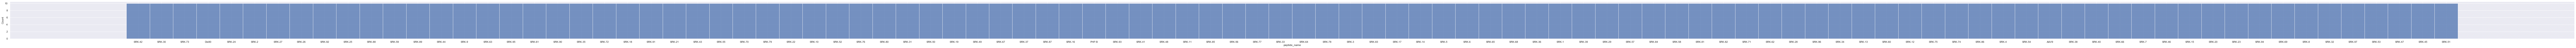

In [40]:
sns.histplot(df, x='peptide_name')
plt.rcParams["figure.figsize"] = (200,3)

Rank by average constrained interface energy score

In [41]:
df_average_by_POI = df.groupby(by=['peptide_name', 'peptide_seq']).mean().reset_index()
df_average_by_POI = df_average_by_POI.sort_values(by='constrained_interface_energy_score', ascending=False).reset_index()
df_average_by_POI.to_csv('./scores.csv')
df_average_by_POI[0:20]

df_selected_peptides = df_average_by_POI.loc[0:19, ['peptide_name', 'peptide_seq', 'constrained_interface_energy_score']]
df_selected_peptides.to_csv(database_path[0:-4] + 'selected_peptide_list.csv')
df_selected_peptides

,peptide_name,peptide_seq,constrained_interface_energy_score
0,SRK-53,AQLTSSNALAQAQTG,173.804960
1,SRK-50,AQNNFNASLAQAQTG,166.991482
2,SRK-28,AQIVSNQMSAQAQTG,122.505731
3,SRK-24,AQFNSKLQLAQAQTG,118.724006
4,SRK-8,AQTHDAQAWAQAQTG,117.117370
5,Dis90,AQWKNMGLQAQAQTG,113.283974
6,SRK-78,AQTAYLEVKAQAQTG,107.396226
7,PHP.B,AQTLAVPFKAQAQTG,105.530522
8,SRK-39,AQLGDITGFAQAQTG,104.153545
9,SRK-64,AQVFQATRTAQAQTG,103.654788


(Outdated) Rank by selecting top 1 from each competition

In [21]:
sorting_metric_name = 'constrained_interface_energy_score'

df['competition_name'] = df['model_name'].str.slice_replace(-15, None, '')

list_peptides = []

for competition_name in set(df['competition_name']):
    df_competition = df[df['competition_name'] == competition_name].copy()
    df_competition_mean = df_competition.groupby(by=['peptide_name', 'peptide_seq']).mean().reset_index()
    df_competition_mean = df_competition_mean.sort_values(by=sorting_metric_name, ascending=False).reset_index()
    list_peptides.append([df_competition_mean.loc[0]['peptide_name'], df_competition_mean.loc[0]['peptide_seq']])

df_selected_peptides = pd.DataFrame(list_peptides, columns = ['peptide_name', 'peptide_seq'])
df_selected_peptides.to_csv(database_path[0:-4] + 'selected_peptide_list.csv')
df_selected_peptides

,peptide_name,peptide_seq
0,SRK-21,AQFRHLTGAAQAQTG
1,SRK-53,AQLTSSNALAQAQTG
2,SRK-13,AQWTEQRLVAQAQTG
3,SRK-37,AQSPPVQGLAQAQTG
4,SRK-17,AQTTMGTMLAQAQTG
5,SRK-35,AQHNLRDSIAQAQTG
6,SRK-82,AQTMTPSGIAQAQTG
7,PHP.B,AQTLAVPFKAQAQTG
8,SRK-24,AQFNSKLQLAQAQTG
9,SRK-36,AQGPGTSFKAQAQTG


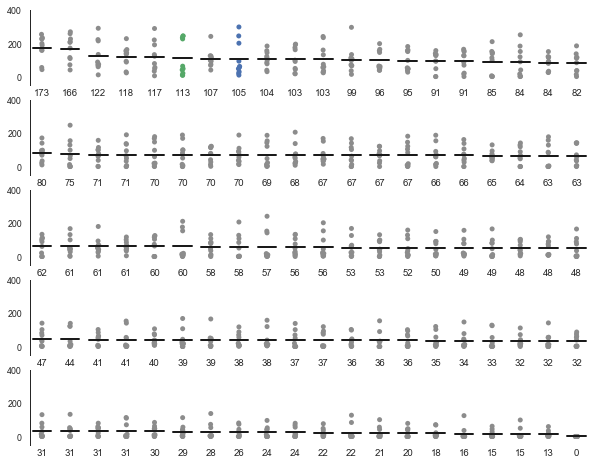

In [97]:
fig, axes = plt.subplots(5, 20)
sns.set_style("white")
sns.set_context("paper")


for i, peptide_name in enumerate(df_average_by_POI['peptide_name']):
    j = i // 20
    k = i % 20
    
    # Set the y axis
    if k == 0:
        sns.despine(bottom = True, left=False, right=True, ax=axes[j, k])
    else:
        sns.despine(bottom = True, left=True, right=True, ax=axes[j, k])
        axes[j,k].set(yticklabels=[])
 
        
    if peptide_name == 'PHP.B':
        color_setting = sns.color_palette()[0]
    elif peptide_name == 'Dis90':
        color_setting = sns.color_palette()[2]
    else:
        color_setting = sns.color_palette()[7]
    sns.swarmplot(ax=axes[j,k], x="peptide_name", y="constrained_interface_energy_score", data=df.loc[df['peptide_name']==peptide_name], color=color_setting)# split=True,scale="count", inner="stick")
    sns.boxplot(ax=axes[j,k], 
            showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="peptide_name",
            y="constrained_interface_energy_score",
            data=df.loc[df['peptide_name']==peptide_name],
            showfliers=False,
            showbox=False,
            showcaps=False)
    axes[j, k].annotate(int(np.mean(df.loc[df['peptide_name']==peptide_name, "constrained_interface_energy_score"])), xy=(0.5, -0.1), xycoords='axes fraction', ha='center', va='center')# fc='w')#, size=14, ha='right', va='top',))
    #axes[j, k].set_title(variable_name, wrap=True)
    axes[j,k].set_ylim(-50, 400)
    axes[j,k].set_xlabel('')
    axes[j,k].set_ylabel('')
    axes[j,k].set(xticklabels=[])
   
    
#plt.tight_layout()

fig.set_size_inches(10, 8)
fig.savefig('Fig5B.png', dpi=300)


### Analyze data for pairwise competition (R2)

In [118]:
# set paths
peptide_list_path = './mock_selection/R1_database_APPRAISE_measurements_08191524selected_peptide_list_18.csv'
database_path = './mock_selection/R2_database_APPRAISE_measurements_08192118.csv'
database_mean_path = database_path[0:-4] + '_mean.csv'


#define output file paths
sorted_database_path = './mock_selection/database_peptide_receptor_distance_measurement_sorted.csv'

#sort the database by variants
list_peptide_order = pd.read_csv(peptide_list_path)['peptide_name'].to_list()
df = pd.read_csv(database_path)
df_sorted = sort_df_by_peptides(df, list_peptide_order)

# Calculate the constrained scores
df_sorted = calculate_scores(df_sorted, version=1.2, depth_constraint=True)

# Save the scores
df_sorted.to_csv()
df_sorted

,model_name,receptor_name,peptide_chain,peptide_name,competitors,peptide_seq,peptide_length,receptor_Rg,receptor_Rminor,pep_mod_start_resi,...,competitor,interface_energy_score,interface_energy_score_competitor,interface_energy_score_difference,constrained_interface_energy_score,pocket_relative_depth,constrained_interface_energy_score_competitor,peptide_tip_receptor_distance_competitor,pocket_relative_depth_competitor,constrained_interface_energy_score_difference
1036,Ly6a_and_SRK-53_vs_SRK-53_unrelaxed_rank_3_mod...,Ly6a,B,SRK-53,['SRK-53'],AQLTSSNALAQAQTG,15,13.418411,13.4,3,...,SRK-53,70,125,-55,122.208035,8.052161,174.236880,5.503581,7.896419,-52.028845
1037,Ly6a_and_SRK-53_vs_SRK-53_unrelaxed_rank_3_mod...,Ly6a,C,SRK-53,['SRK-53'],AQLTSSNALAQAQTG,15,13.418411,13.4,3,...,SRK-53,173,70,103,222.236883,7.896419,122.208039,5.347839,8.052161,100.028845
1564,Ly6a_and_SRK-53_vs_SRK-53_unrelaxed_rank_5_mod...,Ly6a,B,SRK-53,['SRK-53'],AQLTSSNALAQAQTG,15,13.341077,13.4,3,...,SRK-53,0,0,0,46.430173,7.743431,87.297854,3.842715,9.557285,-40.867682
1565,Ly6a_and_SRK-53_vs_SRK-53_unrelaxed_rank_5_mod...,Ly6a,C,SRK-53,['SRK-53'],AQLTSSNALAQAQTG,15,13.341077,13.4,3,...,SRK-53,0,0,0,87.297854,9.557285,46.430173,5.656569,7.743431,40.867682
3210,Ly6a_and_SRK-53_vs_SRK-53_unrelaxed_rank_2_mod...,Ly6a,B,SRK-53,['SRK-53'],AQLTSSNALAQAQTG,15,13.300397,13.4,3,...,SRK-53,0,36,-36,95.954373,9.863285,46.314074,8.710318,4.689682,49.640299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4669,Ly6a_and_SRK-2_vs_SRK-13_unrelaxed_rank_1_model_1,Ly6a,C,NaN,['SRK-2'],AQWTEQRLVAQAQTG,15,13.338409,13.4,3,...,NaN,230,0,230,278.724041,7.868907,32.069968,6.555115,6.844885,246.654074
4702,Ly6a_and_SRK-2_vs_SRK-13_unrelaxed_rank_4_model_4,Ly6a,B,NaN,['SRK-13'],AQNNSVRQLAQAQTG,15,13.325921,13.4,3,...,NaN,0,0,0,28.249300,6.561491,19.170210,7.633987,5.766013,9.079090
4703,Ly6a_and_SRK-2_vs_SRK-13_unrelaxed_rank_4_model_4,Ly6a,C,NaN,['SRK-2'],AQWTEQRLVAQAQTG,15,13.325921,13.4,3,...,NaN,0,0,0,19.170209,5.766013,28.249299,6.838509,6.561491,-9.079090
4712,Ly6a_and_SRK-13_vs_SRK-70_unrelaxed_rank_3_mod...,Ly6a,B,NaN,['SRK-70'],AQWTEQRLVAQAQTG,15,13.245144,13.4,3,...,NaN,0,0,0,38.637185,7.283417,13.747734,8.238883,5.161117,24.889451


Automatically determined the tie threshold to be 5.91


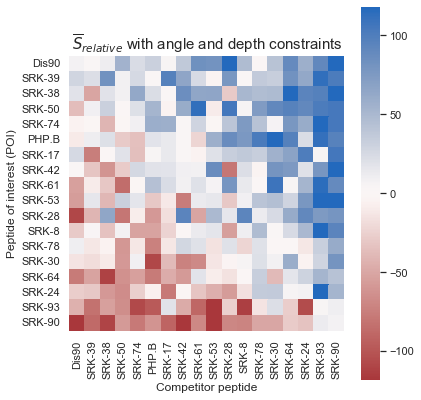

In [122]:
df_average = df_sorted.groupby(by=['peptide_name', 'competitor']).mean().reset_index()
plot_heatmap(df_average, 'constrained_interface_energy_score_difference', 'Ly6a_all', rank_by_tournament=True, title=r'$\overline{S}_{relative}$ with angle and depth constraints')